### Pandas Theory
: 정형(like Table) 데이터 분석에 최적화된 라이브러리
- Pandas 는 `DataFrame` 형태로 모든 데이터를 표현합니다.
- 다양한 데이터 조작 기능을 제공합니다. 
    - indexing(=search), filtering, reshaping, concat, reading/writing, ...
- 벡터 연산에 최적화되어 있다. -> Numpy 와 연관성이 있다


#### Pandas 를 사용해야하는 이유
- 대부분의 정제된 데이터들은 테이블 형태로 표현됩니다.
    - ex) Relation Database 형태 -> Import Excel / MySQL, DBMS 등
    - 이러한 테이블 형태의 데이터를 분석하기에 최적의 라이브러리이다.
- numpy 처럼 정형화된 데이터 연산에 최적화 되어있다. 성능이 매우 뛰어나다.
- 다양한 정형 데이터를 통합 관리할 수 있다. json, html, csv, xlsx, hdf5, sql, ... 등 모두 DataFrame으로 통일해서 표현될 수 있다.
- Excel 에서 제공하는 연산 기능을 거의 다 제공한다.

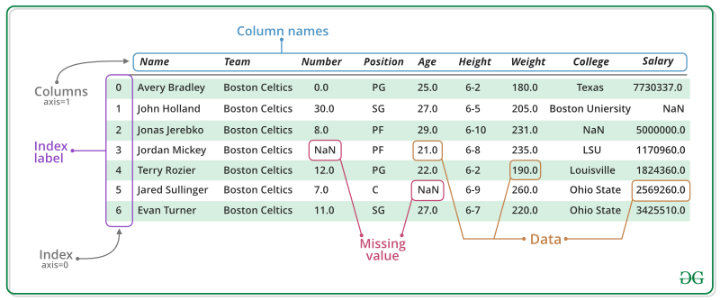

https://www.geeksforgeeks.org/creating-a-pandas-dataframe/?ref=lbp

#### DataFrame
- DataFrame은 2차원 테이블 구조를 말한다.
- 1차원 구조인 'Series' 도 있다. (1row or 1 column)
- row, column 으로 모든 원소를 구분한다. (indexing)
- index, columns, values 라는 객체 변수를 가지고 있다.  
- Relation DB 와 완전히 호환된다.
- 하나의 Column 을 기준으로 모든 원소의 data type 이 동일하다.
    (모두 numpy array가 가지는 data type 과 동일)
- DataFrame 은 numpy array 를 상위 호환하는 개념으로 universal function이 사용 가능하다.
    - 내부 구현체로 numpy array 를 사용한다.

### Pandas

#### 1. Pandas DataFrame and Operations

In [2]:
import pandas as pd
import numpy as np

In [3]:
# s 는 1, 3, 5, np.nan, 6, 8을 원소로 가지는 pandas.Series
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- nan 은 float64 로 인식되어 dtype 이 float64 로 설정됨

In [3]:
# 12x4 행렬에 1부터 48까지의 숫자를 가지고, index 는 0부터 시작하고 columns 는 x1, x2, x3, x4 로 하는 DataFrame
df = pd.DataFrame(data=np.arange(1,49).reshape(12,4), 
                  index=np.arange(12), 
                  columns=["X1", "X2", "X3", "X4"])
df

,X1,X2,X3,X4
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16
4,17,18,19,20
5,21,22,23,24
6,25,26,27,28
7,29,30,31,32
8,33,34,35,36
9,37,38,39,40


In [8]:
# dataframe index
df.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int32')

In [9]:
# dataframe columns
df.columns

Index(['X1', 'X2', 'X3', 'X4'], dtype='object')

In [10]:
# dataframe values
df.values

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24],
       [25, 26, 27, 28],
       [29, 30, 31, 32],
       [33, 34, 35, 36],
       [37, 38, 39, 40],
       [41, 42, 43, 44],
       [45, 46, 47, 48]])

- numpy array 로 나옴

In [12]:
# 특정 column 을 가져오기 ( dictionary like ) - Series
df["X2"]

0      2
1      6
2     10
3     14
4     18
5     22
6     26
7     30
8     34
9     38
10    42
11    46
Name: X2, dtype: int32

In [13]:
# X1 column 에 2 더하기
df["X1"] + 2

0      3
1      7
2     11
3     15
4     19
5     23
6     27
7     31
8     35
9     39
10    43
11    47
Name: X1, dtype: int32

#### 2.2 Dataframe 기초 method

In [14]:
# df.head(n)
df.head()

,X1,X2,X3,X4
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16
4,17,18,19,20


In [16]:
# df.tail(n)
df.tail()

,X1,X2,X3,X4
7,29,30,31,32
8,33,34,35,36
9,37,38,39,40
10,41,42,43,44
11,45,46,47,48


In [17]:
# dataframe 에 대한 전체적인 요약정보. index, column, null/not-null/dtype/memory usage 가 표현됨
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      12 non-null     int32
 1   X2      12 non-null     int32
 2   X3      12 non-null     int32
 3   X4      12 non-null     int32
dtypes: int32(4)
memory usage: 240.0 bytes


In [18]:
# dataframe 에 대한 전체적인 통게 정보
df.describe()

,X1,X2,X3,X4
count,12.000000,12.000000,12.000000,12.000000
mean,23.000000,24.000000,25.000000,26.000000
std,14.422205,14.422205,14.422205,14.422205
min,1.000000,2.000000,3.000000,4.000000
25%,12.000000,13.000000,14.000000,15.000000
50%,23.000000,24.000000,25.000000,26.000000
75%,34.000000,35.000000,36.000000,37.000000
max,45.000000,46.000000,47.000000,48.000000


In [20]:
# X2 column 을 기준으로 내림차순 정렬
df.sort_values(by="X2", ascending=False)

,X1,X2,X3,X4
11,45,46,47,48
10,41,42,43,44
9,37,38,39,40
8,33,34,35,36
7,29,30,31,32
6,25,26,27,28
5,21,22,23,24
4,17,18,19,20
3,13,14,15,16
2,9,10,11,12


#### 2.3. Fancy Indexing
- 데이터를 filtering <-> Searching
- 전체 데이터에서 원하는 일부 데이터를 찾아오는 방법

In [23]:
# X1 column 을 indexing
df.X1

0      1
1      5
2      9
3     13
4     17
5     21
6     25
7     29
8     33
9     37
10    41
11    45
Name: X1, dtype: int32

In [22]:
# dataframe 에서 slicing 을 이용하면 row 단위로 잘려나온다.
df[:3]

,X1,X2,X3,X4
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [24]:
# df 에서 index value 를 기준으로 indexing 가능
# df.loc[index]
df.index[0]

0

In [27]:
# df.loc 는 특정값(index)을 기준으로 indexing 을 한다.
df.loc[0]

X1    1
X2    2
X3    3
X4    4
Name: 0, dtype: int32

In [28]:
# df.loc 에 2차원 indexing 도 가능하다.
# df.loc[indexing, columns]
df.loc[4, "X2"]


18

In [31]:
df.loc[3:5, "X1"]

3    13
4    17
5    21
Name: X1, dtype: int32

In [30]:
df.loc[3:5, ["X1", "X4"]]

,X1,X4
3,13,16
4,17,20
5,21,24


In [29]:
df.loc[3:5, "X1":"X3"]

,X1,X2,X3
3,13,14,15
4,17,18,19
5,21,22,23


In [6]:
# mask 메소드를 이용하면 조건을 만족하는 데이터를 특정한 값으로 마스킹할 수 있습니다
# Q. df 에서 X3 column 에 있는 원소들 중에 3의 배수만 출력.
mask = df["X3"] % 3 == 0 #mask
mask

0      True
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9      True
10    False
11    False
Name: X3, dtype: bool

- 이러한 True, False 값들을 mask라 함.

In [5]:
df[mask]

,X1,X2,X3,X4
0,1,2,3,4
3,13,14,15,16
6,25,26,27,28
9,37,38,39,40


In [8]:
df.loc[mask, 'X3']

0     3
3    15
6    27
9    39
Name: X3, dtype: int32

In [11]:
# iloc -> value 를 통해 2차원 indexing 
df.iloc[:, 0:10]

,X1,X2,X3,X4
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16
4,17,18,19,20
5,21,22,23,24
6,25,26,27,28
7,29,30,31,32
8,33,34,35,36
9,37,38,39,40


#### 2.3. 여러 DataFrame 합치기

In [20]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [21]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [22]:
df2

,A,B,C,D
4,A0,B4,C4,D4
5,A1,B5,C5,D5
6,A2,B6,C6,D6
7,A3,B7,C7,D7


In [23]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [18]:
# outer join
# A, B, C, D 이름이 같아서 먼저를 x, 그뒤를 y ... 로 표현한다.
pd.merge(df1, df2, on="A", how="outer")

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN
4,A4,NaN,NaN,NaN,B4,C4,D4
5,A5,NaN,NaN,NaN,B5,C5,D5
6,A6,NaN,NaN,NaN,B6,C6,D6
7,A7,NaN,NaN,NaN,B7,C7,D7


In [26]:
# left join
pd.merge(df1, df2, on="A", how="left")

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5
2,A2,B2,C2,D2,B6,C6,D6
3,A3,B3,C3,D3,B7,C7,D7


In [29]:
# 합치기!
pd.concat([df1, df2, df3], axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B4,C4,D4
5,A1,B5,C5,D5
6,A2,B6,C6,D6
7,A3,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [30]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A0,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A1,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A2,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A3,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [31]:
# df 의 index 가 동일했다면 ?
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[0, 1, 2, 3])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[0, 1, 2, 3])

In [32]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A0,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A1,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A2,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A3,B7,C7,D7,A11,B11,C11,D11


In [33]:
pd.concat([df1, df2, df3], axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A0,B4,C4,D4
1,A1,B5,C5,D5
2,A2,B6,C6,D6
3,A3,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


- index가 깔끔하지 못하다!

In [36]:
# reset_index 를 통해 index 를 재 배열해주고, 기존의 인덱스를 지워준다(drop=True 옵션)
pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B4,C4,D4
5,A1,B5,C5,D5
6,A2,B6,C6,D6
7,A3,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### DataFrame으로 데이터 불러오기
- Source: https://www.kaggle.com/competitions/titanic/data

In [3]:
titanic = pd.read_csv('./data/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- [RangeIndex] 0-890 까지 891 개의 정보가 들어가있다.
- [Column] column 의 개수는 총 12개가 있고, 각각의 이름이 저렇다,
- [Non-Null Count] Age, Cabin, Embarked 는 각각 (891-714, 891-204, 891-889) 만큼 비어있다 -> Nan 이다
    - Nan(결측치)를 처리하는 것은 매우 중요하다! - 분석 전 무조건 처리되어야 한다.
- Dtype 의 object 는 string 으로 되어있는 변수이다.

In [7]:
## object type 은 통계치가 나오지 않는다
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- [Survived] 생존률이 0.383838 이다 ([Death]0, [Survived]1)
- [Pclass-1,2,3] 3이 좀 많을 것이다.

In [11]:
# DataFrame 에서는 복잡하나 Serier 단위에서 value_counts mehtod 를 많이 사용한다. - 빈도분석
titanic.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
# age 가 null(nan) 인 사람들
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [13]:
# titanic[titanic.age > 30]["Fare"] - 권장하지 않는 방법
# 인덱싱(마스크)에 대한 값을 불러온 후 Fare 를 찾는 과정에서 의도와 다르게 결과가 나올 수 있다.
# 또한, loc 로 하는 것이 한 번에 진행되기에 빠르다.
titanic.loc[titanic.Age > 30, "Fare"]

1      71.2833
3      53.1000
4       8.0500
6      51.8625
11     26.5500
        ...   
873     9.0000
879    83.1583
881     7.8958
885    29.1250
890     7.7500
Name: Fare, Length: 305, dtype: float64